In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
import seaborn as sns


# optics bestanden
## alle parts en items over de gehele tijd en alle linacs


In [5]:
linac2_headers = pd.read_csv("data/calblocks_update_table_cal_headers.csv", names=["date", "file_name", "empty", "thiing", "thing"])
linac2_items = pd.read_csv("data/calblocks_update_table_cal_items.csv",  names=["item", "category", "thing", "thiing"])
linac2_values = pd.read_csv("data/calblocks_update_table_cal_values.csv", names=["id", "calheaders_id", "item", "part", "value"])

linac2_headers.reset_index(inplace=True)
linac2_headers.set_index("level_0", inplace=True)
linac2_headers['datum'] = linac2_headers['date'].str.replace('/', '-', regex=False)

linac2_headers['date'] = pd.to_datetime(linac2_headers['date'], format='%d/%m/%Y')
linac2_headers["date"] = linac2_headers["date"].astype("str")

linac2_headers.columns = ["linac","date", "file_name", "empty", "thiing", "thing", "datum"]

In [6]:
tempdf = linac2_headers[["linac", "date", "file_name"]].merge(linac2_values[["calheaders_id", "item", "part", "value"]] ,left_on="level_0", right_on="calheaders_id", how="inner").drop(columns="calheaders_id")
merged_df = tempdf.merge(linac2_items[["item", "category"]], on = "item", how="inner")

merged_df["Part&item"] = "I:"+ merged_df["item"].astype(str) + " P:"+ merged_df["part"].astype(str)
merged_df = merged_df.sort_values(["linac", "date"])


Optics files

In [8]:
tempdf = linac2_headers[["linac", "date", "file_name"]].merge(linac2_values[["calheaders_id", "item", "part", "value"]] ,left_on="level_0", right_on="calheaders_id", how="inner").drop(columns="calheaders_id")
merged_df = tempdf.merge(linac2_items[["item", "category"]], on = "item", how="inner")


merged_df = merged_df[merged_df["linac"] != 7460]

optics_df = merged_df[merged_df["file_name"].str.contains("Optics")].copy()
optics_df["Part&item"] = "I:"+ optics_df["item"].astype(str) + " P:"+ optics_df["part"].astype(str)

In [9]:
optics_files = optics_df["file_name"].unique().tolist()

show = pd.DataFrame(index=optics_files)
show["parts"] = [optics_df[optics_df["file_name"] == file]["part"].unique().tolist() for file in optics_files]
show["items"] = [optics_df[optics_df["file_name"] == file]["item"].unique().tolist() for file in optics_files]
show["amount of dates"] = [len(optics_df[optics_df["file_name"] == file]["date"].unique().tolist()) for file in optics_files]


In [10]:
total_changes = []
for file in show.index:
    mlc = merged_df[merged_df["file_name"] == file].copy()
    mlc["Part&item"] = "I:" + mlc["item"].astype(str) + " P:" + mlc["part"].astype(str)


    nop45 = mlc[mlc["part"] != 45]

    for linac in list(set(nop45["linac"])):
        result = pd.DataFrame()

        linec_df = nop45[nop45["linac"] == linac]
        dates = list(set(linec_df["date"]))

        for item in range(len(dates)-1):
            old = linec_df[linec_df["date"] == dates[item]]
            new = linec_df[linec_df["date"] == dates[item+1]]

            diff = new["value"].values - old["value"].values
            temp = pd.DataFrame({
                "date": new["date"].tolist(),
                "difference": diff,
                "PI": new["Part&item"],
                "linac": new["linac"]
            })

            result = pd.concat([temp, result])
            

    changed = result[result["difference"] != 0]

    changes = changed["PI"].unique().tolist()

    total_changes.append(changes)

    #only the changed combination of part and item
    changes_df = mlc[mlc["Part&item"].isin(changes)]


show["veranderingen"] = [len(change) for change in total_changes]
show


,parts,items,amount of dates,veranderingen
Optics_Gen_Cal_Data,"[131.0, 130.0, 181.0, 383.0, 384.0, 385.0, 386...","[2291, 2292, 2293, 2009, 2288, 2280, 2290]",39,2
Optics_Dist_Y2_01_To_40,"[398.0, 399.0, 400.0, 401.0]",[2380],39,4
Optics_LP_Y_01_To_20,"[280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286...",[2300],39,20
Optics_Dist_Y1_01_To_40,"[398.0, 399.0, 400.0, 401.0]",[2460],39,4
Optics_LP_X_01_To_20,"[260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266...",[2300],39,20


# Optics_Gen_Cal_Data
109: Calibrated X co-ordinate of the centre of the reference reflector.
110: Calibrated Y co-ordinate of the centre of the reference reflector.


2983
2325
2638
2191


C:\Users\Laris\AppData\Local\Temp\ipykernel_4464\3055770331.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_cal["Part&item"] = "I:"+ gen_cal["item"].astype(str) + " P:"+ gen_cal["part"].astype(str)


item            2280            
part           109.0       110.0
category Ref Refl 01 Ref Refl 01
count          13.00       13.00
mean          242.77      354.38
std             1.64        1.76
min           240.00      352.00
25%           242.00      353.00
50%           243.00      354.00
75%           244.00      355.00
max           245.00      357.00
count           8.00        8.00
mean          212.88      349.38
std            13.64        0.92
min           202.00      348.00
25%           203.00      349.00
50%           203.50      349.00
75%           229.00      350.00
max           230.00      351.00
count          15.00       15.00
mean          248.67      362.73
std             8.19        2.91
min           237.00      358.00
25%           238.00      359.00
50%           253.00      364.00
75%           254.00      365.00
max           257.00      365.00
count          16.00       16.00
mean          228.38      376.88
std             1.31        3.84
min           226.00      371.00
25%           227.75      374.00
50%           229.00      375.50
75%           229.00      381.00
max           230.00      381.00

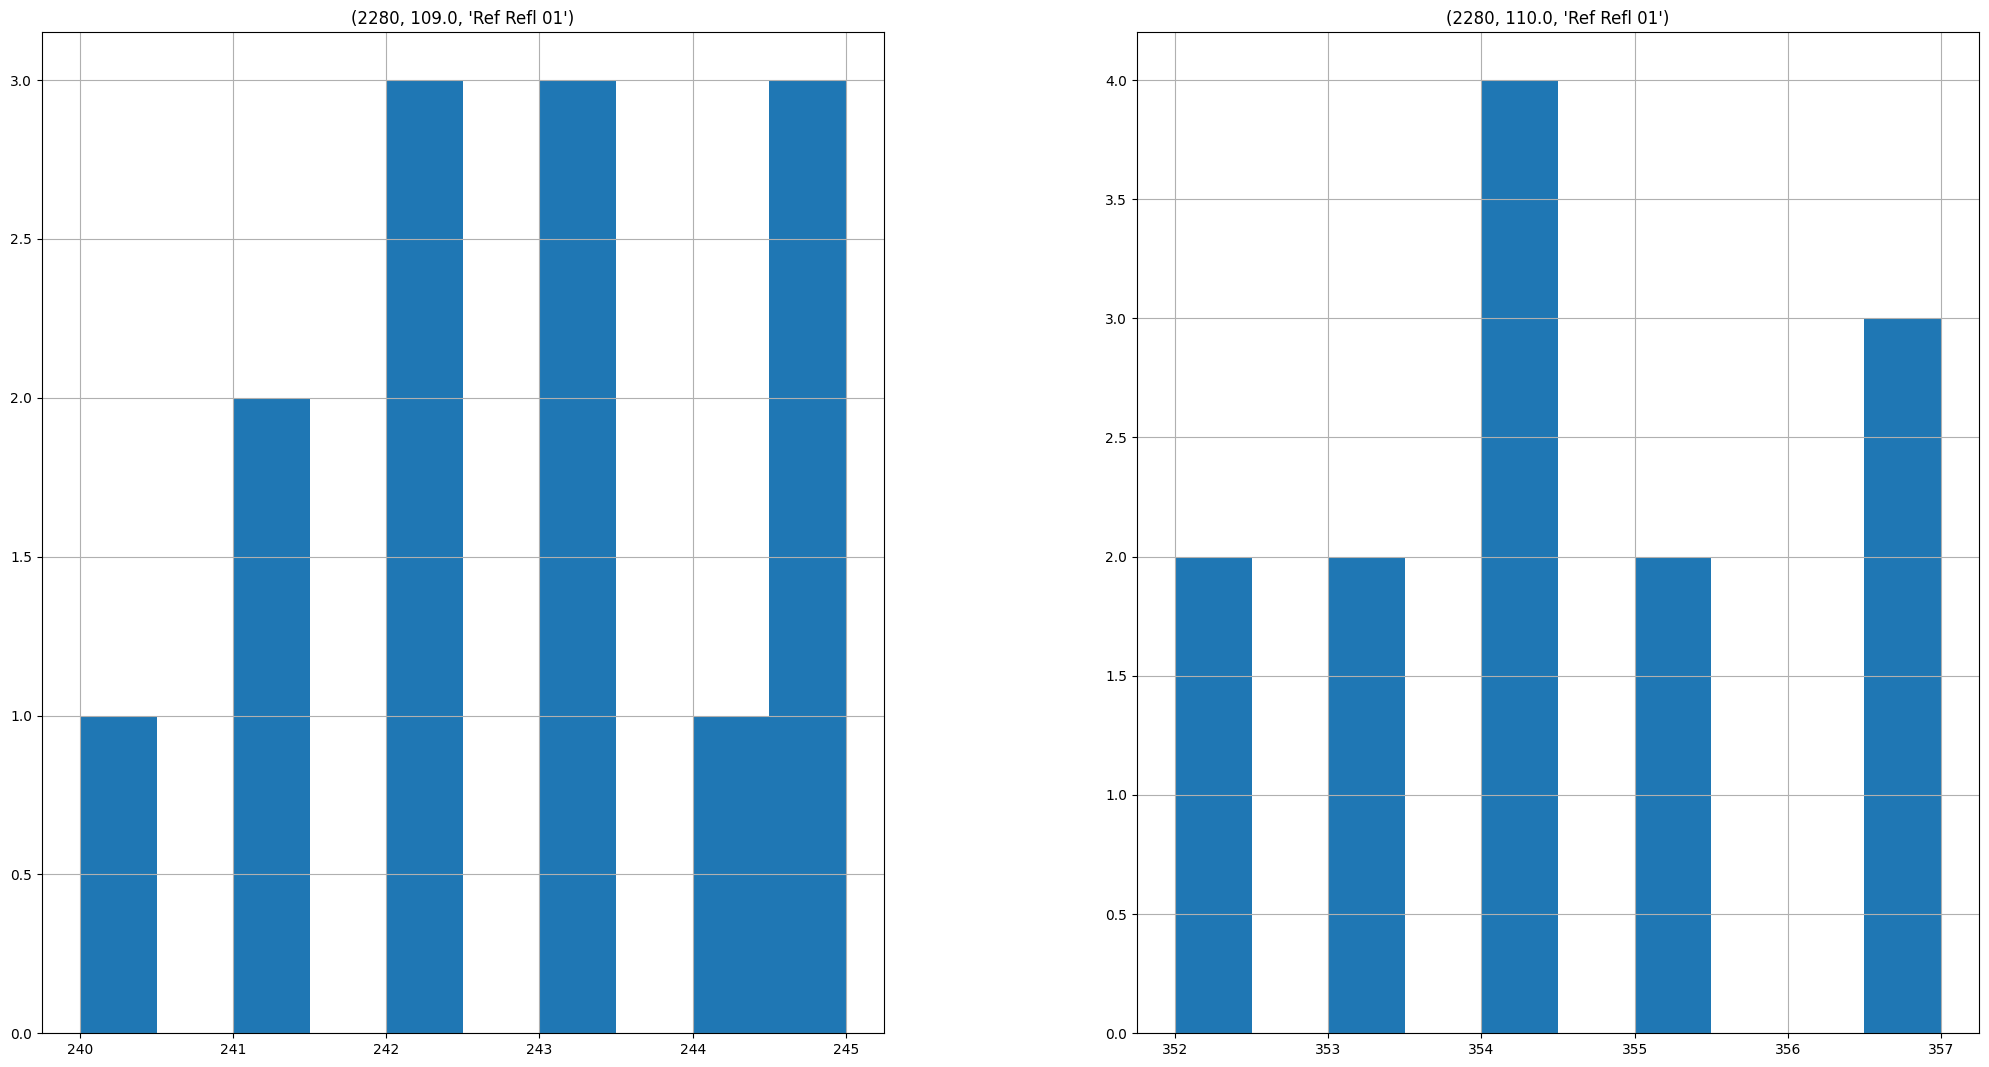

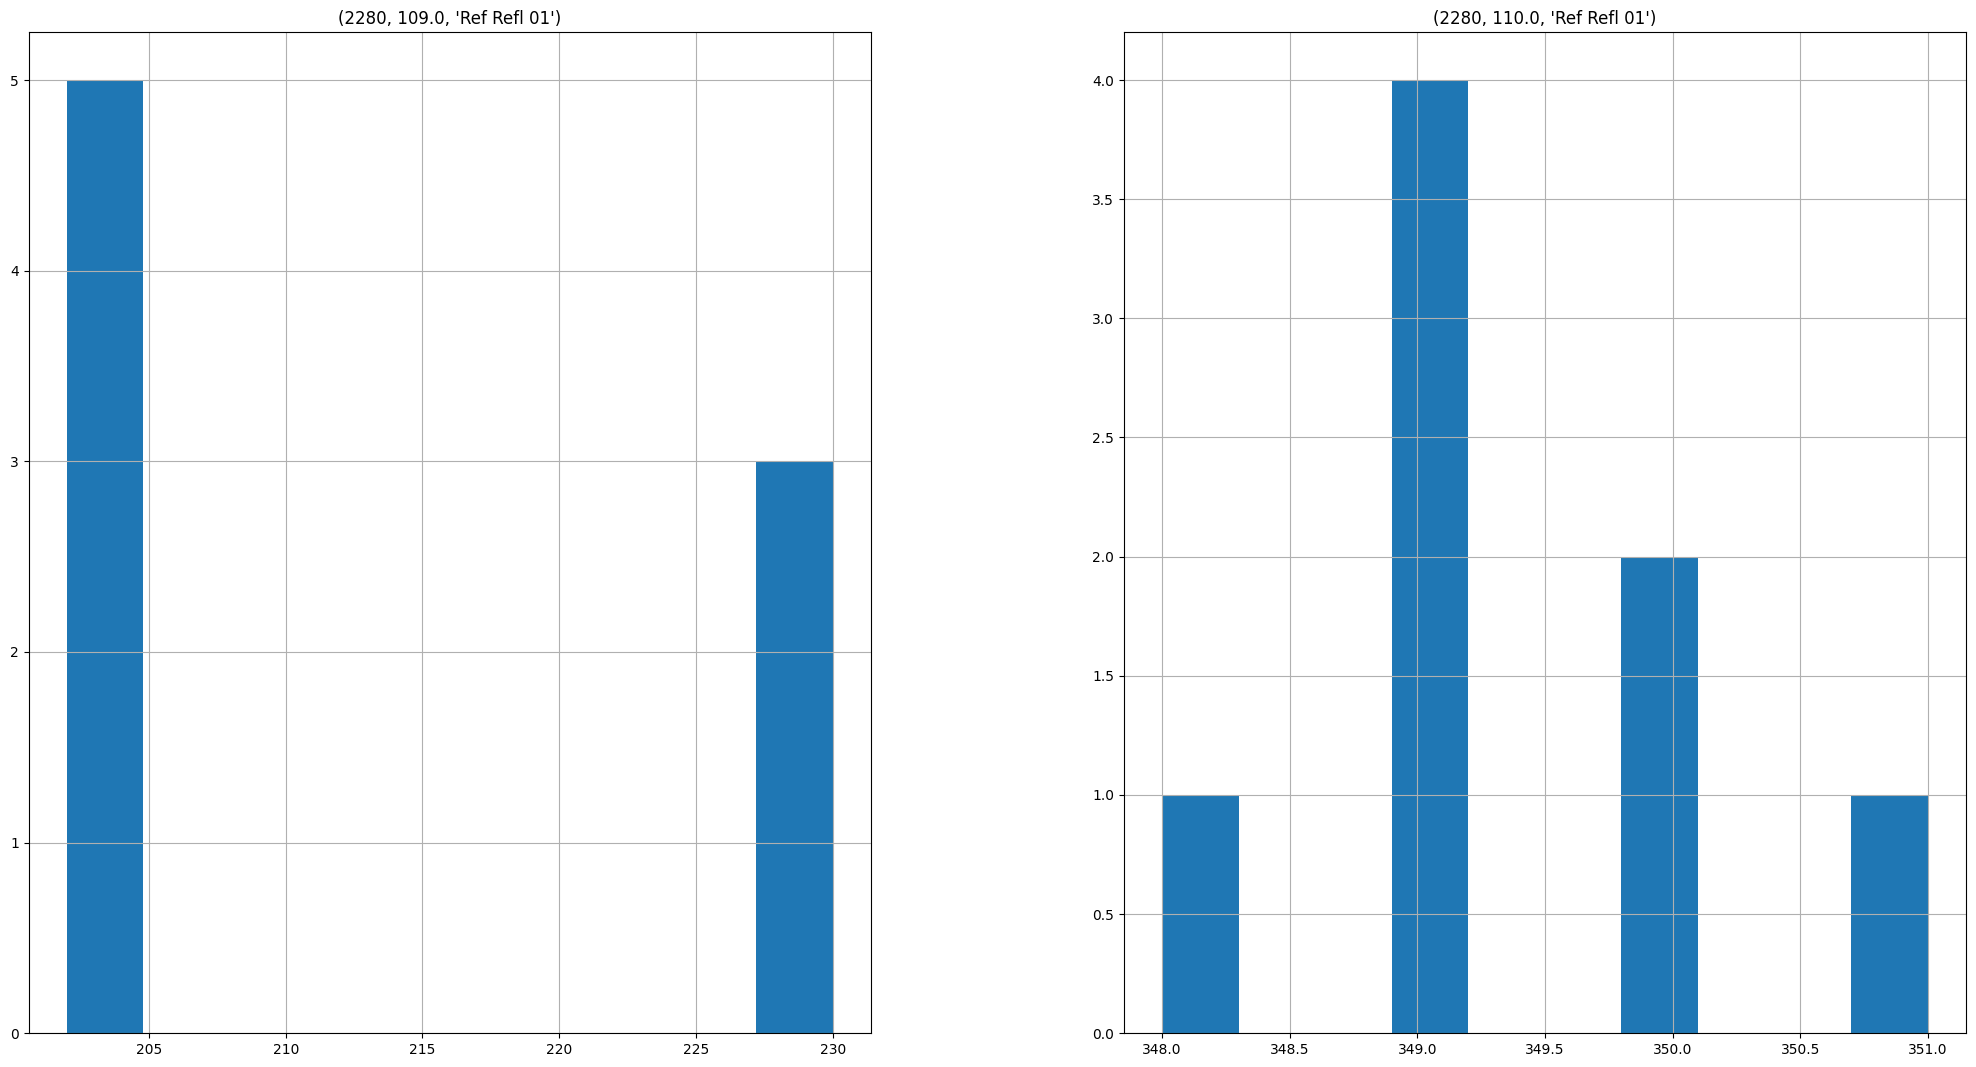

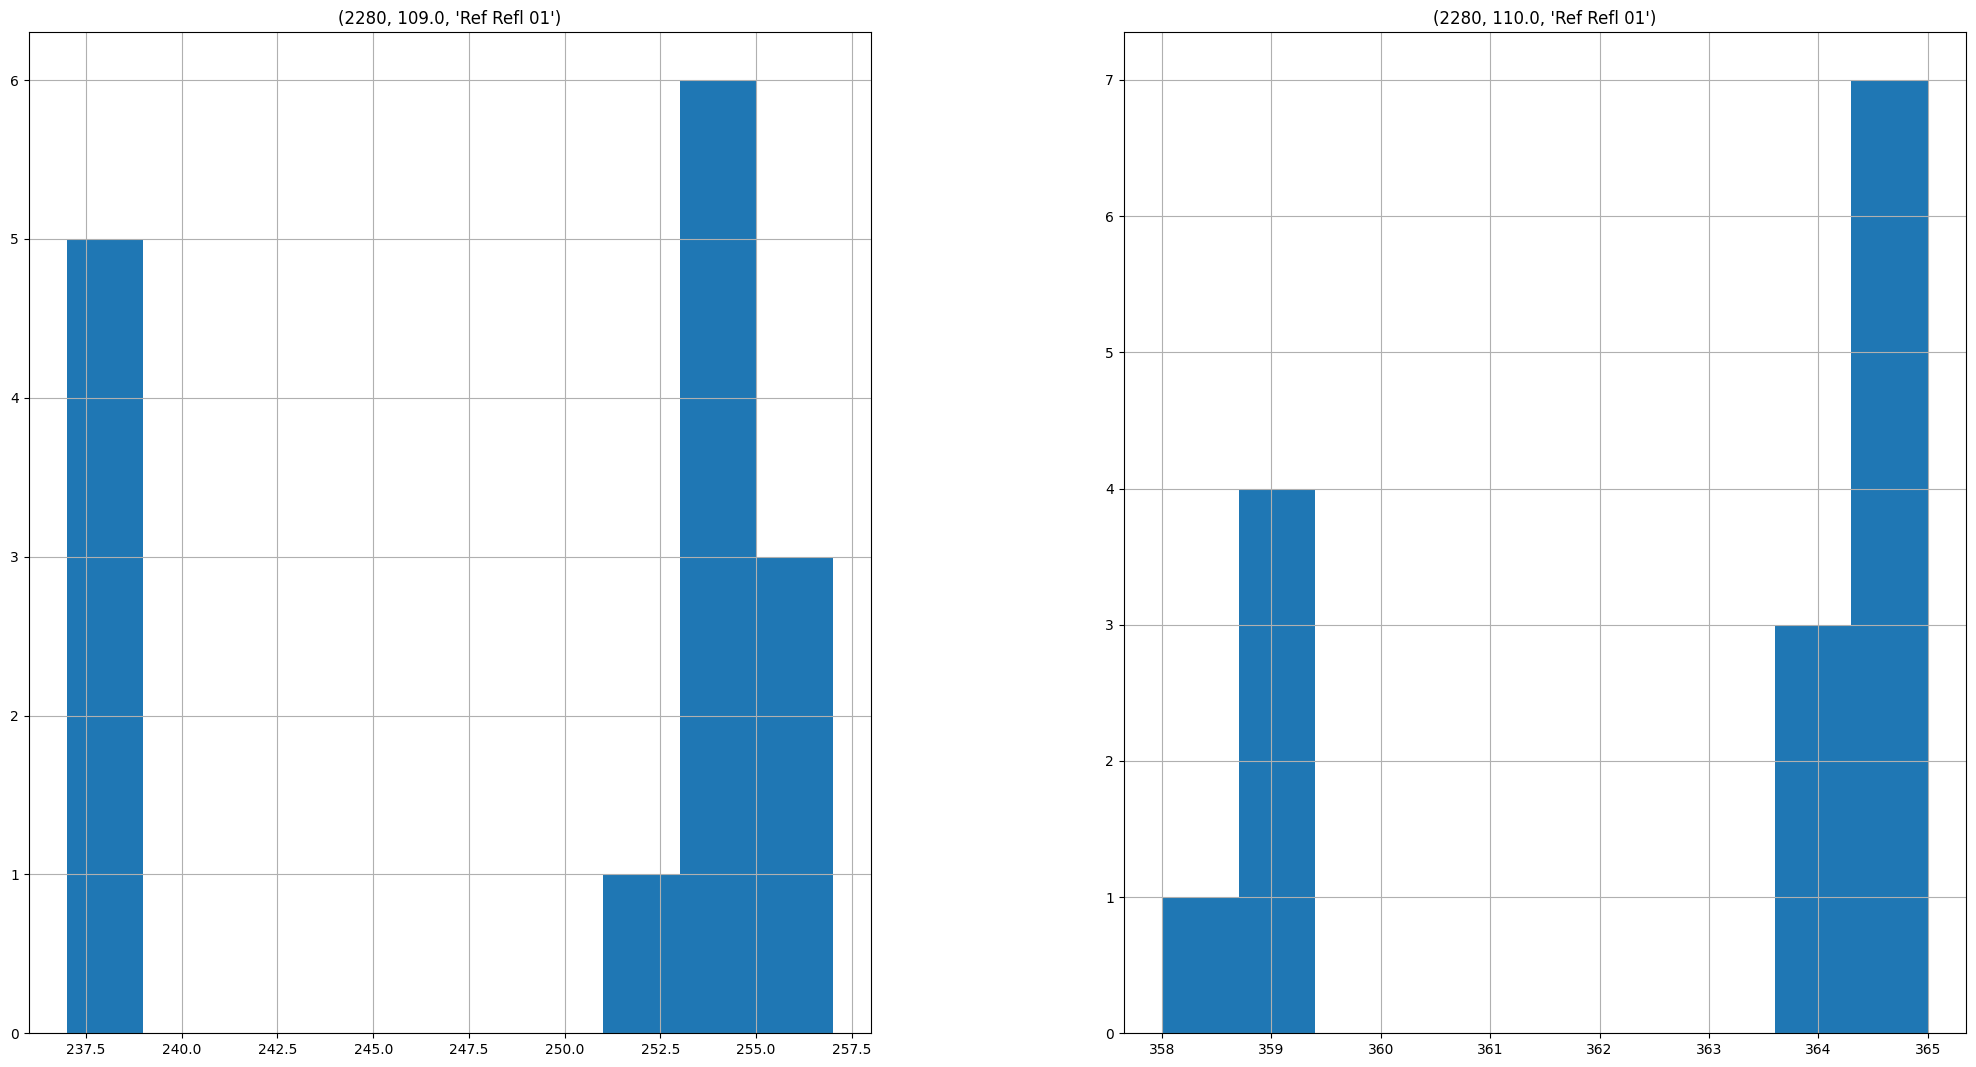

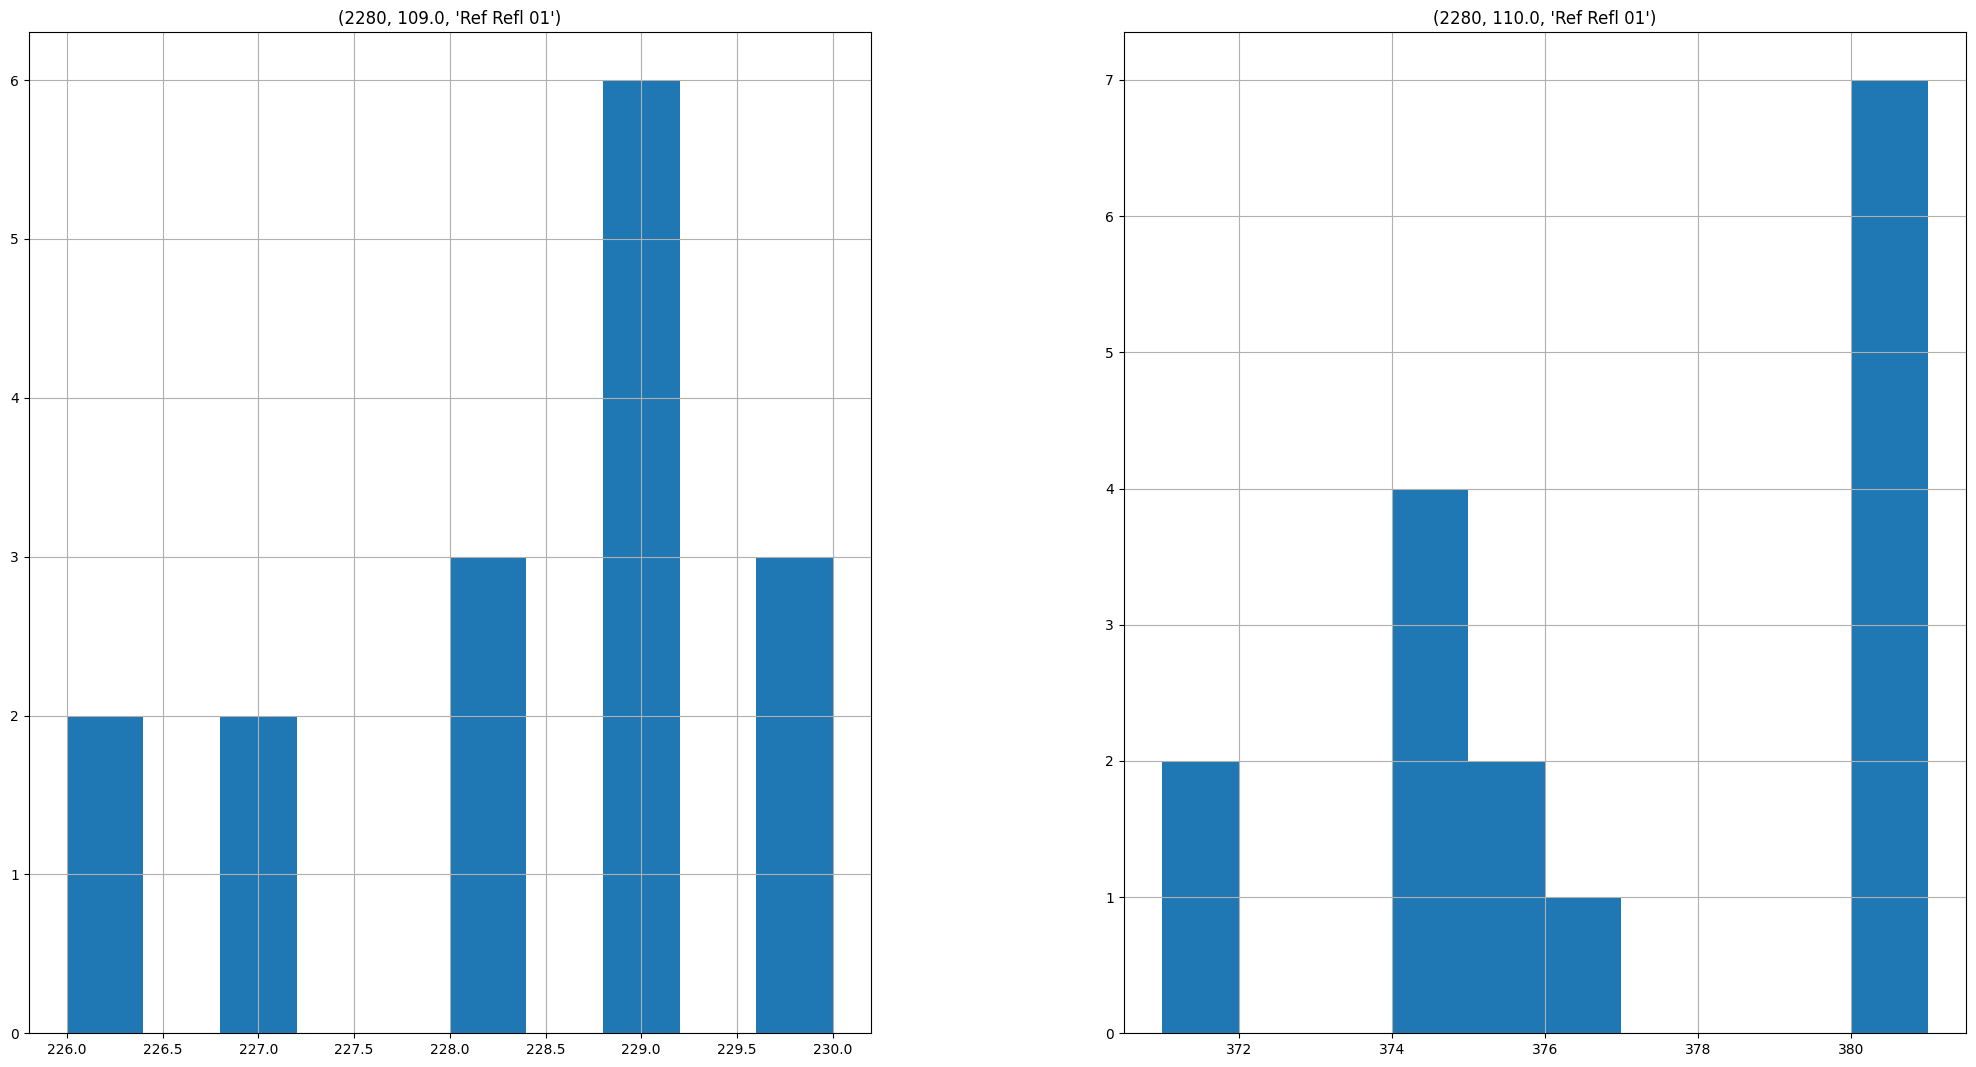

In [11]:

def determine_changes_analysis(gen_cal):
    nop45 = gen_cal[gen_cal["part"] != 45]

    for linac in list(set(nop45["linac"])):
        result = pd.DataFrame()

        linec_df = nop45[nop45["linac"] == linac]
        dates = list(set(linec_df["date"]))

        for item in range(len(dates)-1):
            old = linec_df[linec_df["date"] == dates[item]]
            new = linec_df[linec_df["date"] == dates[item+1]]

            diff = new["value"].values - old["value"].values
            temp = pd.DataFrame({
                "date": new["date"].tolist(),
                "difference": diff,
                "PI": new["Part&item"],
                "linac": new["linac"]
            })

            result = pd.concat([temp, result])
        

    changed = result[result["difference"] != 0]

    changes = changed["PI"].unique().tolist()

    total_changes.append(changes)


    #only the changed combination of part and item
    changes_df_gen_cal = gen_cal[gen_cal["Part&item"].isin(changes)]

    show = pd.DataFrame()


    # for every linac the describe of the same data
    for linac in list(set(changes_df_gen_cal["linac"])):
        print(linac)
        pivoted_cal = changes_df_gen_cal[changes_df_gen_cal["linac"] == linac].pivot(index="date", columns=["item", "part", "category"], values="value")
        describing = pivoted_cal.describe()
        show = pd.concat([show, describing])
        pivoted_cal.hist(figsize=(25,13));
    return show, gen_cal

gen_cal = merged_df[merged_df["file_name"] == "Optics_Gen_Cal_Data"]
gen_cal["Part&item"] = "I:"+ gen_cal["item"].astype(str) + " P:"+ gen_cal["part"].astype(str)

show, gen_cal = determine_changes_analysis(gen_cal)

show.round(2)
   

In [12]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(gen_cal[gen_cal["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

# Optics_Dist_Y2_01_To_40
398:
399:
400:
401: Constant term in optics distortion polynomial.

C:\Users\Laris\AppData\Local\Temp\ipykernel_4464\1325619946.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item             2380                                     
part            398.0         399.0        400.0     401.0
category    Leaf Y2 1     Leaf Y2 1    Leaf Y2 1 Leaf Y2 1
count           13.00  1.300000e+01        13.00     13.00
mean       8939095.00 -1.885018e+07  -2340527.62     32.00
std         726697.15  3.346114e+06    451490.36     13.22
min        8044889.00 -2.612176e+07  -2949480.00      7.00
25%        8348095.00 -2.052408e+07  -2739133.00     24.00
50%        8858500.00 -1.895208e+07  -2373371.00     34.00
75%        9364320.00 -1.820070e+07  -1991470.00     38.00
max       10507981.00 -1.232828e+07  -1695660.00     51.00
count            8.00  8.000000e+00         8.00      8.00
mean       -963323.00  6.762104e+07  -1995520.62      4.88
std         564046.00  3.290474e+06    459198.58      8.92
min       -2006749.00  6.328266e+07  -2729689.00     -7.00
25%       -1348369.50  6.525808e+07  -2297292.25     -1.50
50%        -768777.50  6.797062e+07  -1960505.50      5.00
75%        -541421.75  6.978898e+07  -1651342.25     11.50
max        -422729.00  7.198558e+07  -1454489.00     16.00
count           15.00  1.500000e+01        15.00     15.00
mean       2558585.33  3.280033e+07  -4056841.53      9.33
std        5622412.89  2.344389e+07    823352.33     13.54
min       -2099075.00 -1.237584e+06  -5799435.00    -10.00
25%       -1514308.50  3.573845e+06  -4504733.50     -2.00
50%       -1053699.00  4.604222e+07  -3887471.00      9.00
75%        9351805.50  4.947426e+07  -3634000.50     16.00
max       11395423.00  5.293555e+07  -2542449.00     32.00
count           16.00  1.600000e+01        16.00     16.00
mean      20624299.06 -9.619266e+07  -6607733.19    -44.50
std        9554116.08  6.498374e+07   2778918.16     44.46
min        9468558.00 -1.548632e+08 -10160360.00    -97.00
25%       10223749.00 -1.525614e+08  -9095001.25    -84.75
50%       27669518.50 -1.475644e+08  -7972816.00    -59.00
75%       28922695.00 -2.437975e+07  -3677925.00      0.50
max       29440849.00 -2.239880e+07  -3213109.00     15.00

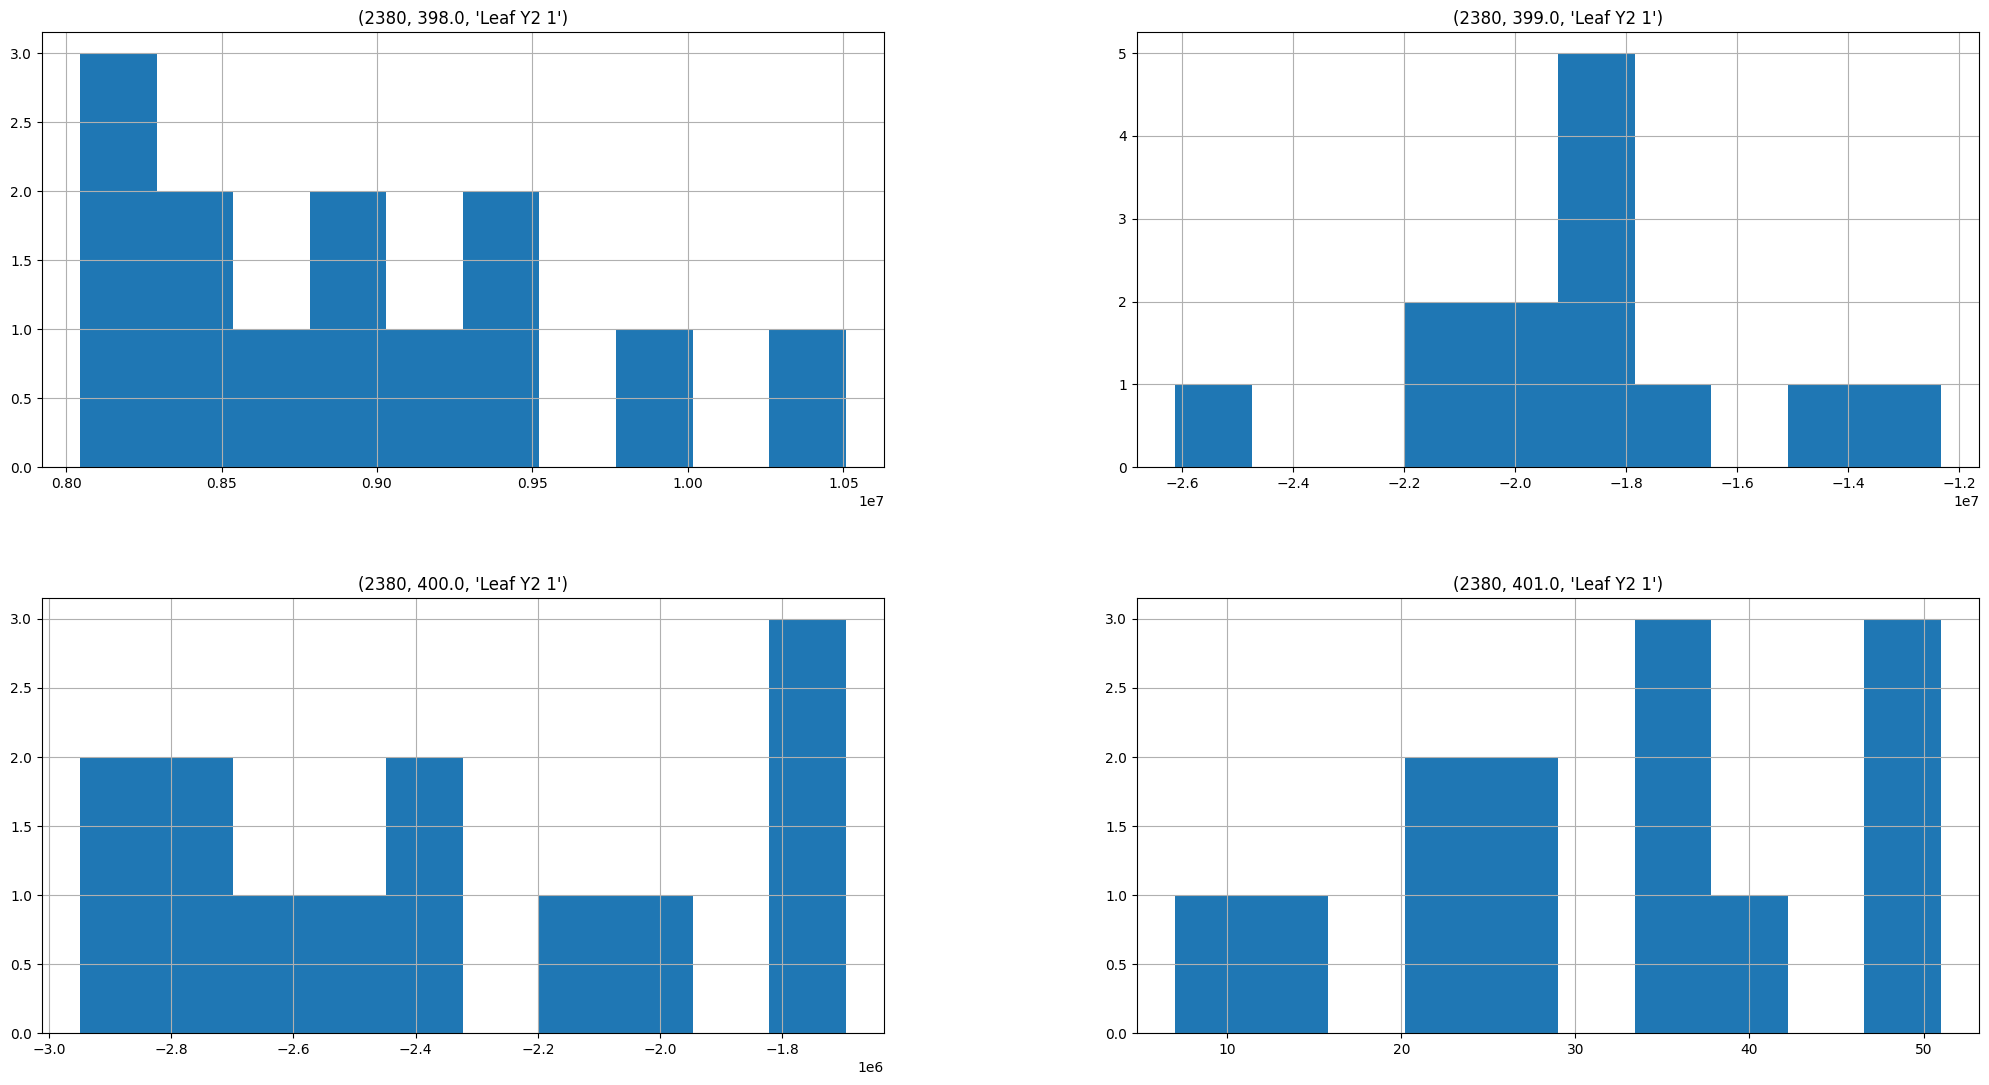

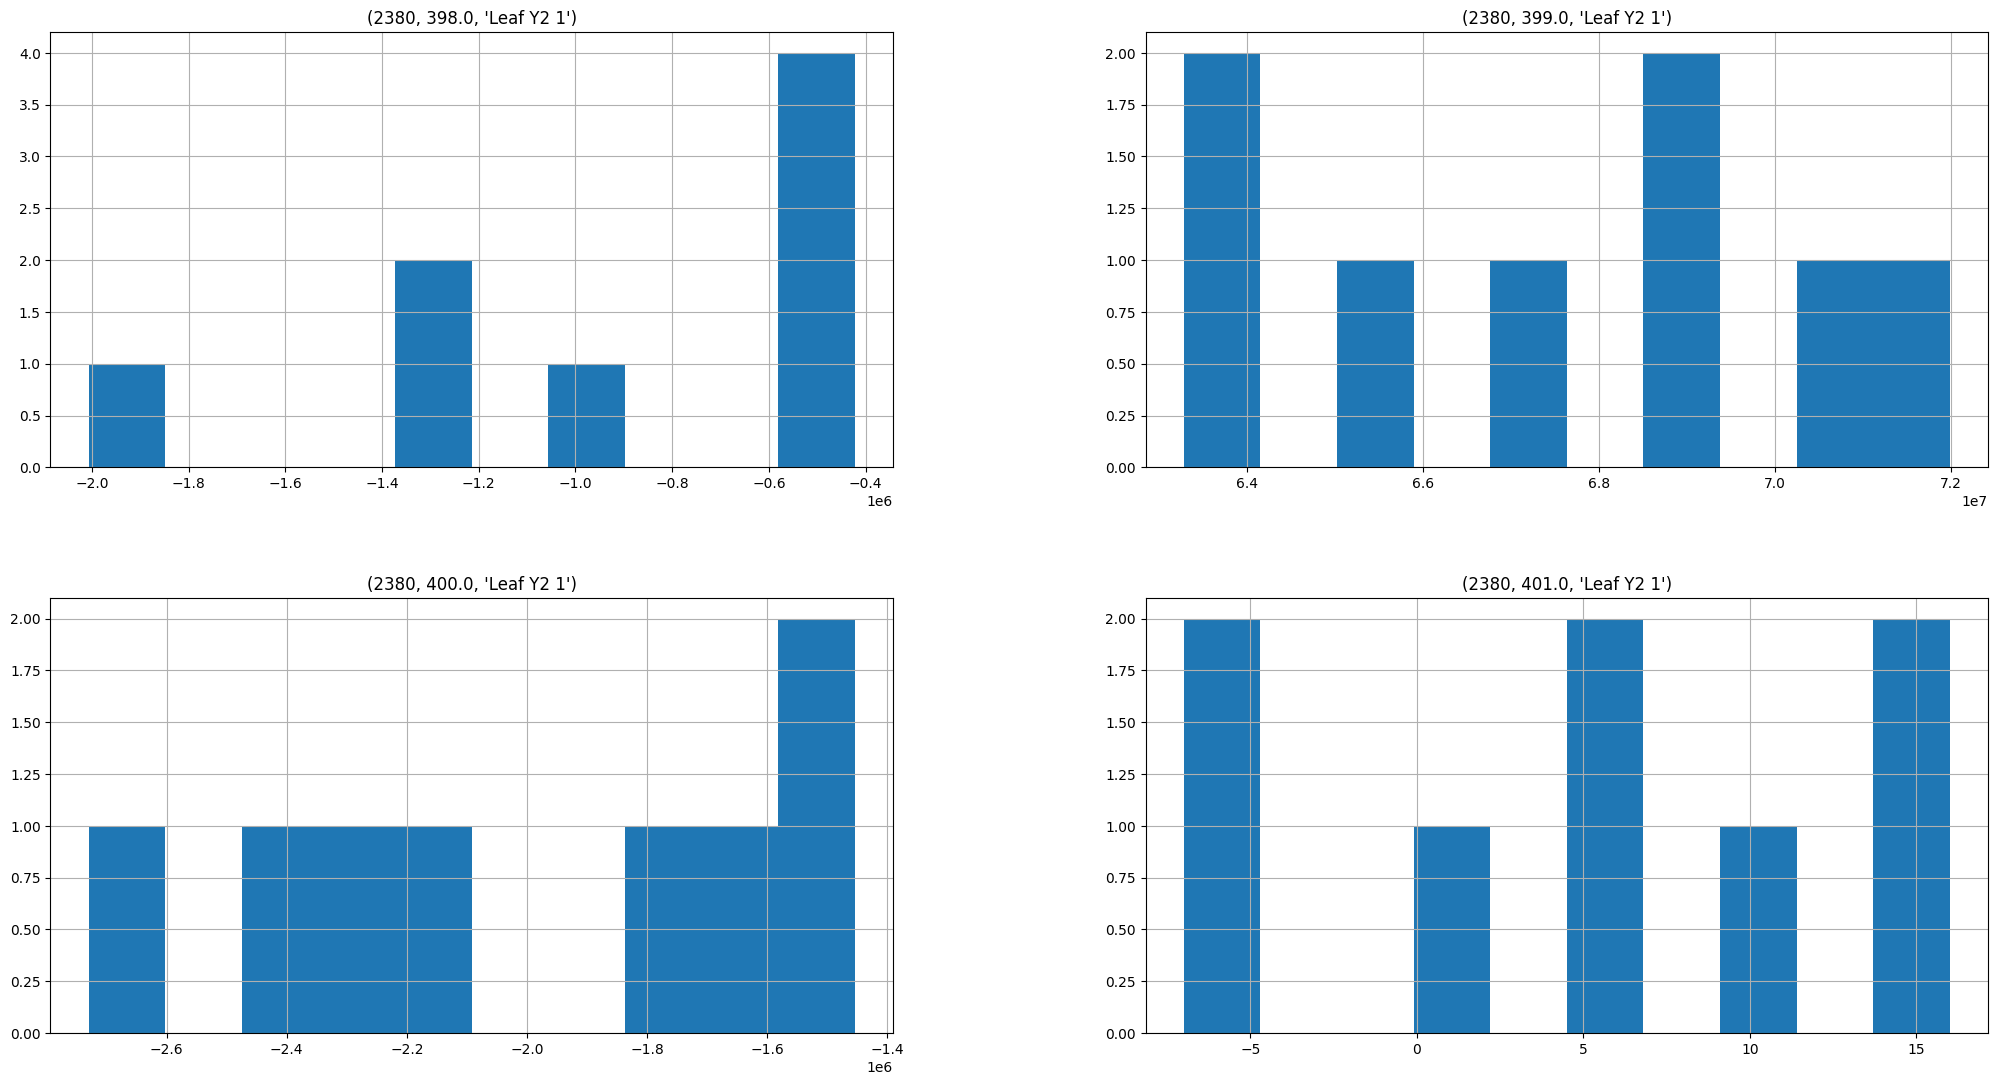

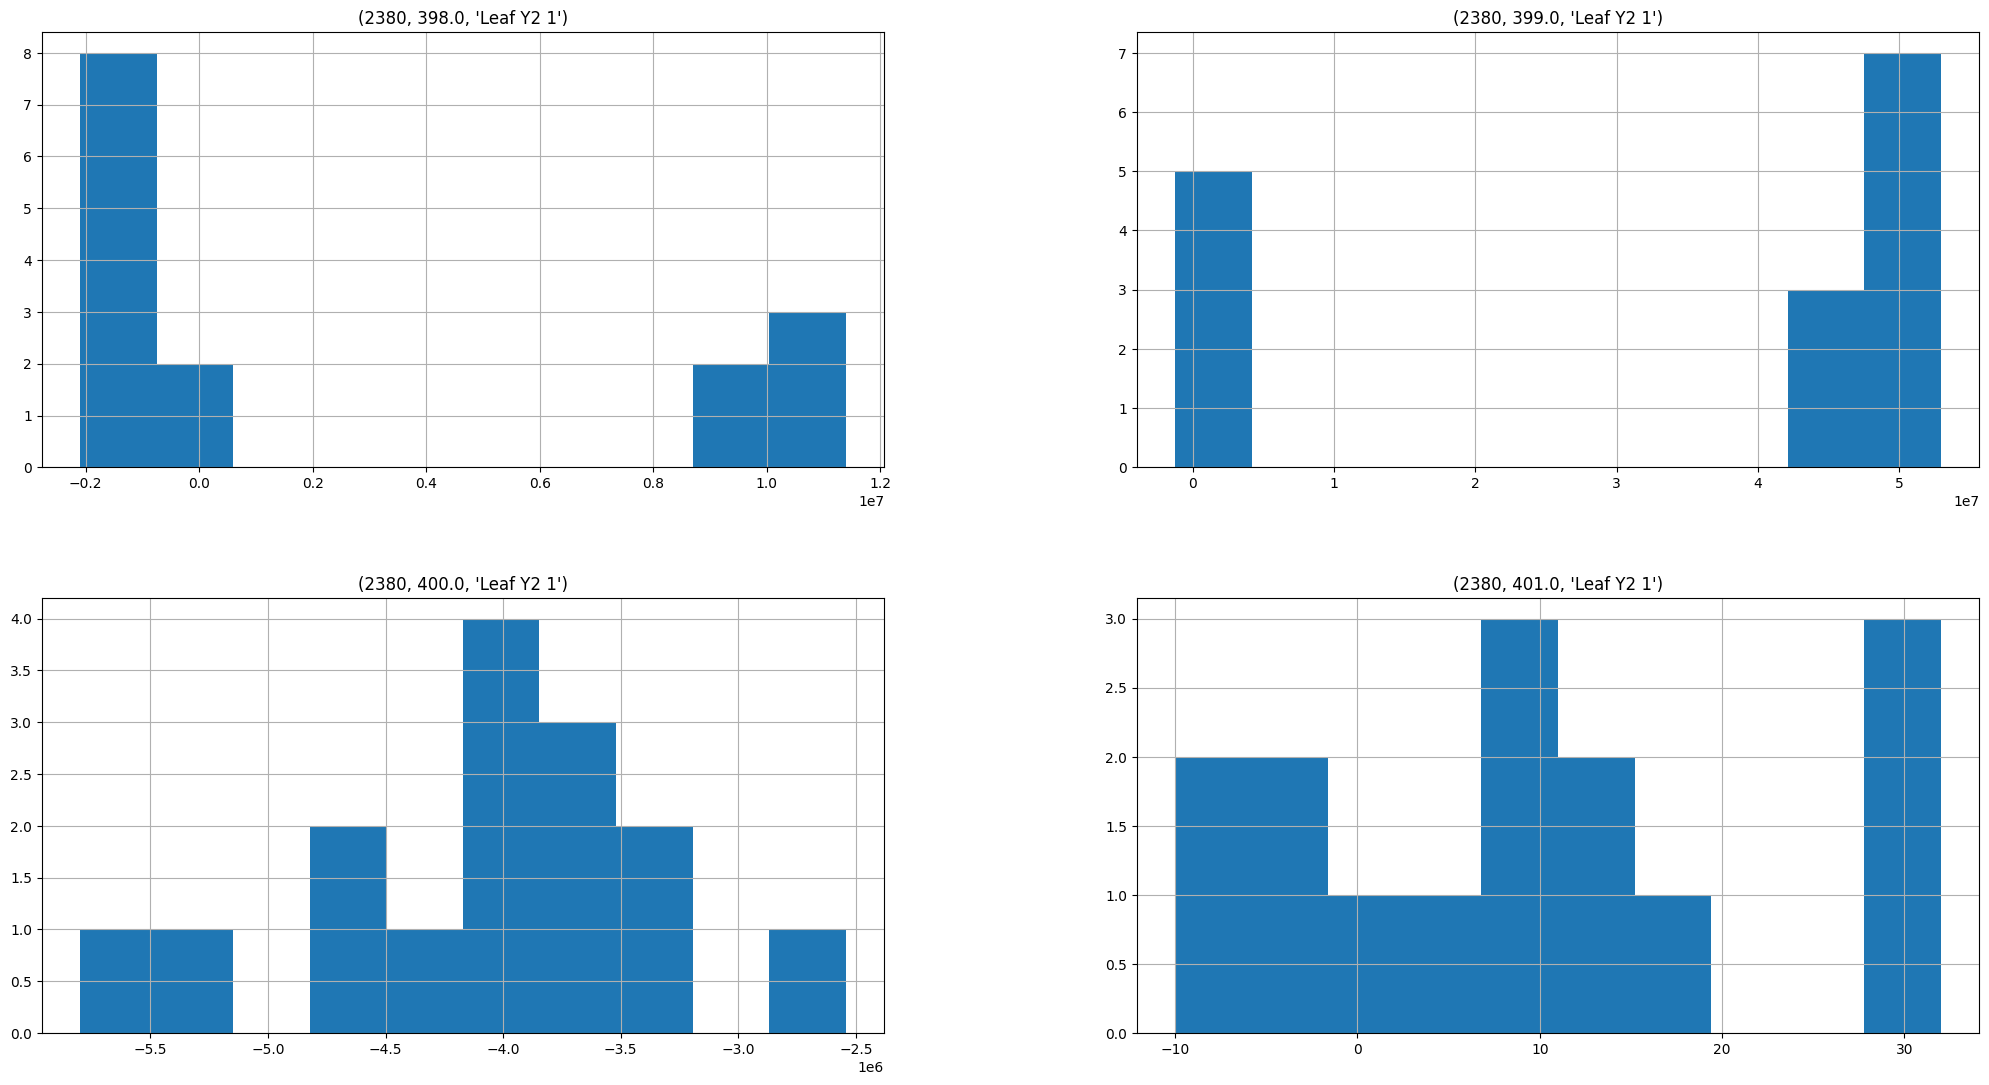

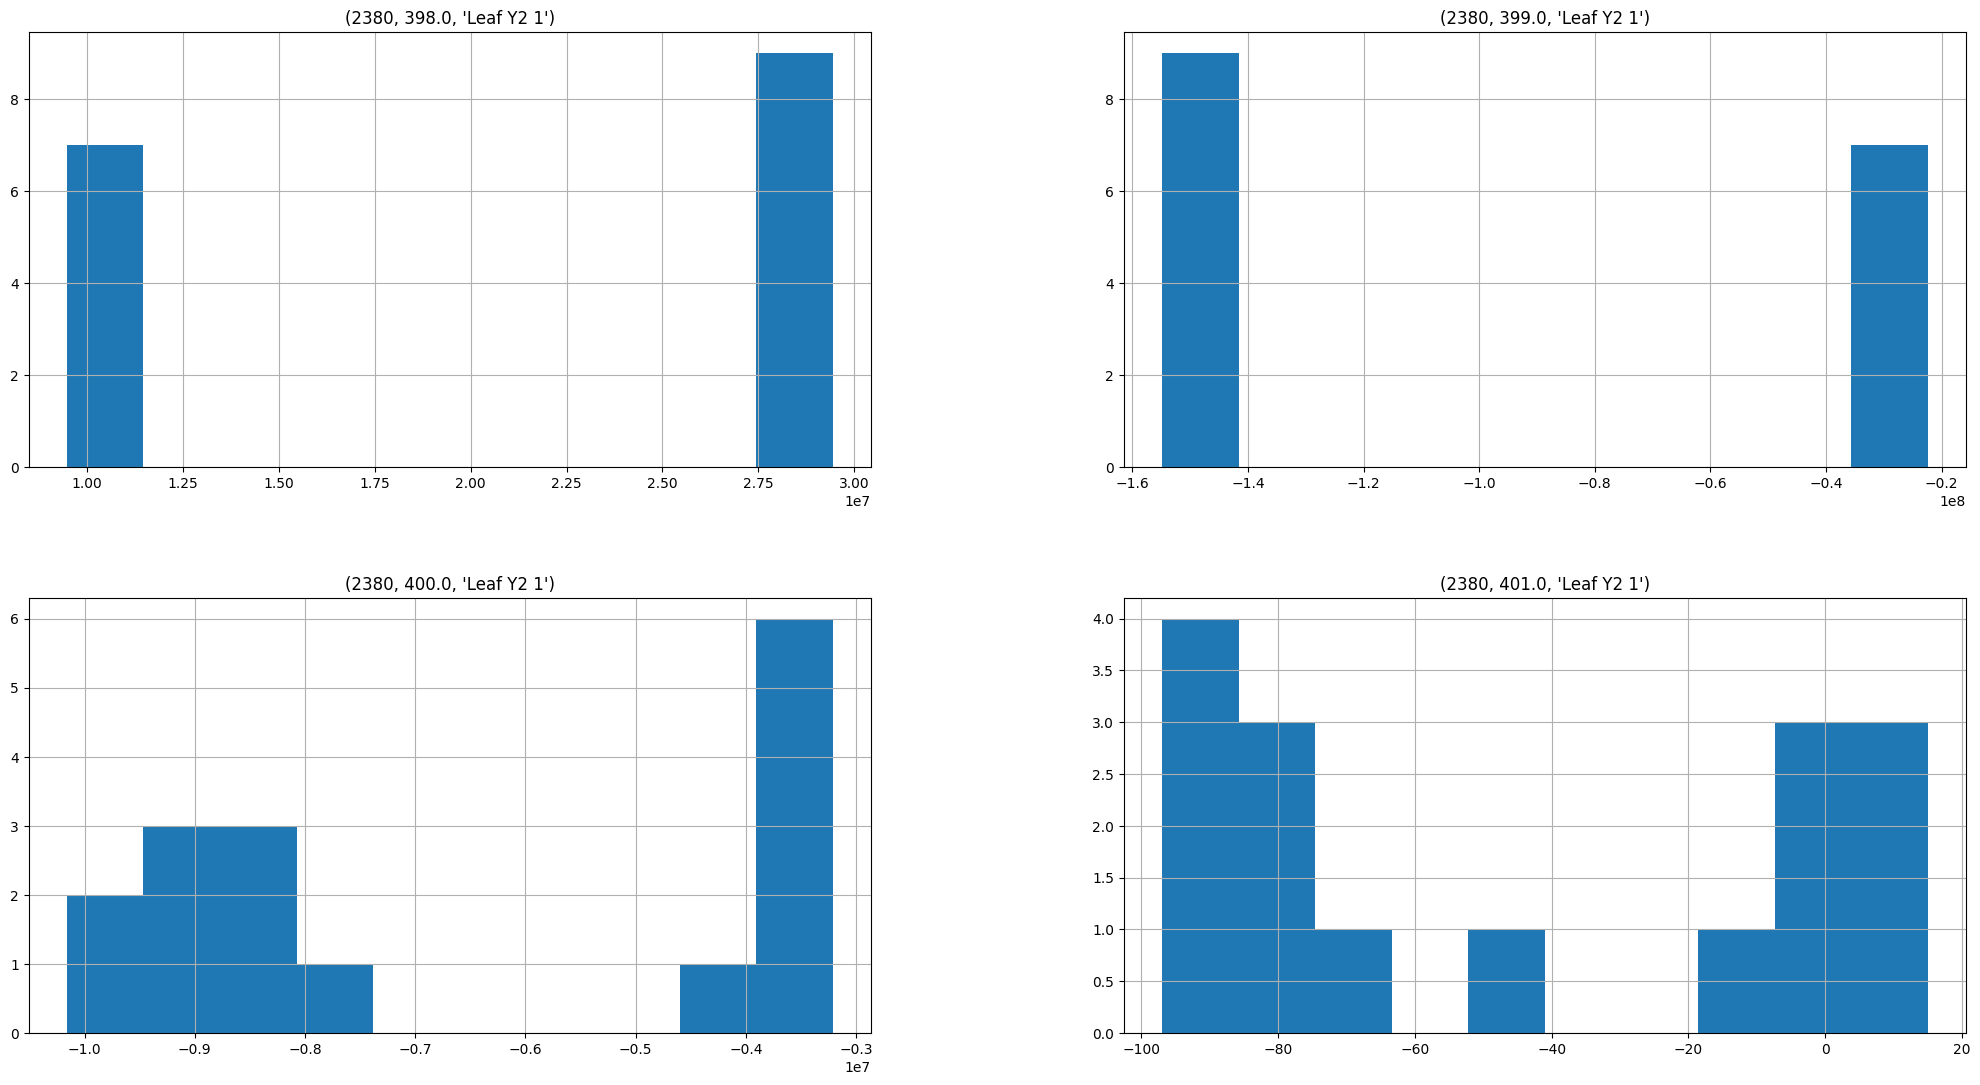

In [13]:
gen_cal = merged_df[merged_df["file_name"] == "Optics_Dist_Y2_01_To_40"]
gen_cal["Part&item"] = "I:"+ gen_cal["item"].astype(str) + " P:"+ gen_cal["part"].astype(str)

show, optics_y2 = determine_changes_analysis(gen_cal)

show.round(2)

In [14]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(optics_y2[optics_y2["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

# Optics_Dist_Y1_01_To_40
398:
399:
400:
401: Constant term in optics distortion polynomial.

C:\Users\Laris\AppData\Local\Temp\ipykernel_4464\971680525.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2983
2325
2638
2191


item             2460                                    
part            398.0         399.0       400.0     401.0
category    Leaf Y1 1     Leaf Y1 1   Leaf Y1 1 Leaf Y1 1
count           13.00  1.300000e+01       13.00     13.00
mean      14847346.62  7.831760e+06 -5263480.54     -0.62
std         970073.46  4.084125e+06   492127.86     12.22
min       13675710.00 -6.854610e+05 -6221409.00    -28.00
25%       14093302.00  7.490589e+06 -5577271.00     -6.00
50%       14704115.00  9.391373e+06 -5150066.00      0.00
75%       15400779.00  1.023522e+07 -4943174.00      6.00
max       16937895.00  1.215651e+07 -4451079.00     18.00
count            8.00  8.000000e+00        8.00      8.00
mean      21545379.38 -5.786262e+07 -4201295.25      9.00
std         957862.36  3.333259e+06   388946.68     11.69
min       20400669.00 -6.297874e+07 -5030590.00     -9.00
25%       20731262.75 -5.980568e+07 -4258364.00      4.75
50%       21423944.00 -5.832472e+07 -4139339.00      8.50
75%       22272509.75 -5.493124e+07 -3995829.75     12.75
max       22809410.00 -5.322692e+07 -3810145.00     28.00
count           15.00  1.500000e+01       15.00     15.00
mean      15264856.00 -1.289850e+07 -5070551.67    -11.27
std        2554873.81  2.020436e+07   586427.98     32.81
min       11116044.00 -3.115997e+07 -5852518.00    -60.00
25%       12386782.00 -2.761251e+07 -5495250.50    -36.00
50%       16056144.00 -2.300813e+07 -5117402.00    -21.00
75%       17540116.00  1.160870e+07 -4990500.00     15.50
max       17944622.00  1.861301e+07 -3756652.00     47.00
count           16.00  1.600000e+01       16.00     16.00
mean       8920153.62  9.250414e+07 -2850843.62     48.56
std        1878474.46  6.807541e+07  1363522.98     44.61
min        5418024.00  1.343479e+07 -5103913.00    -16.00
25%        7359096.25  1.838962e+07 -3702799.00      1.75
50%        9666769.50  1.462076e+08 -3176074.50     67.00
75%       10220634.75  1.511165e+08 -1567011.25     85.25
max       11079572.00  1.532825e+08  -998786.00    105.00

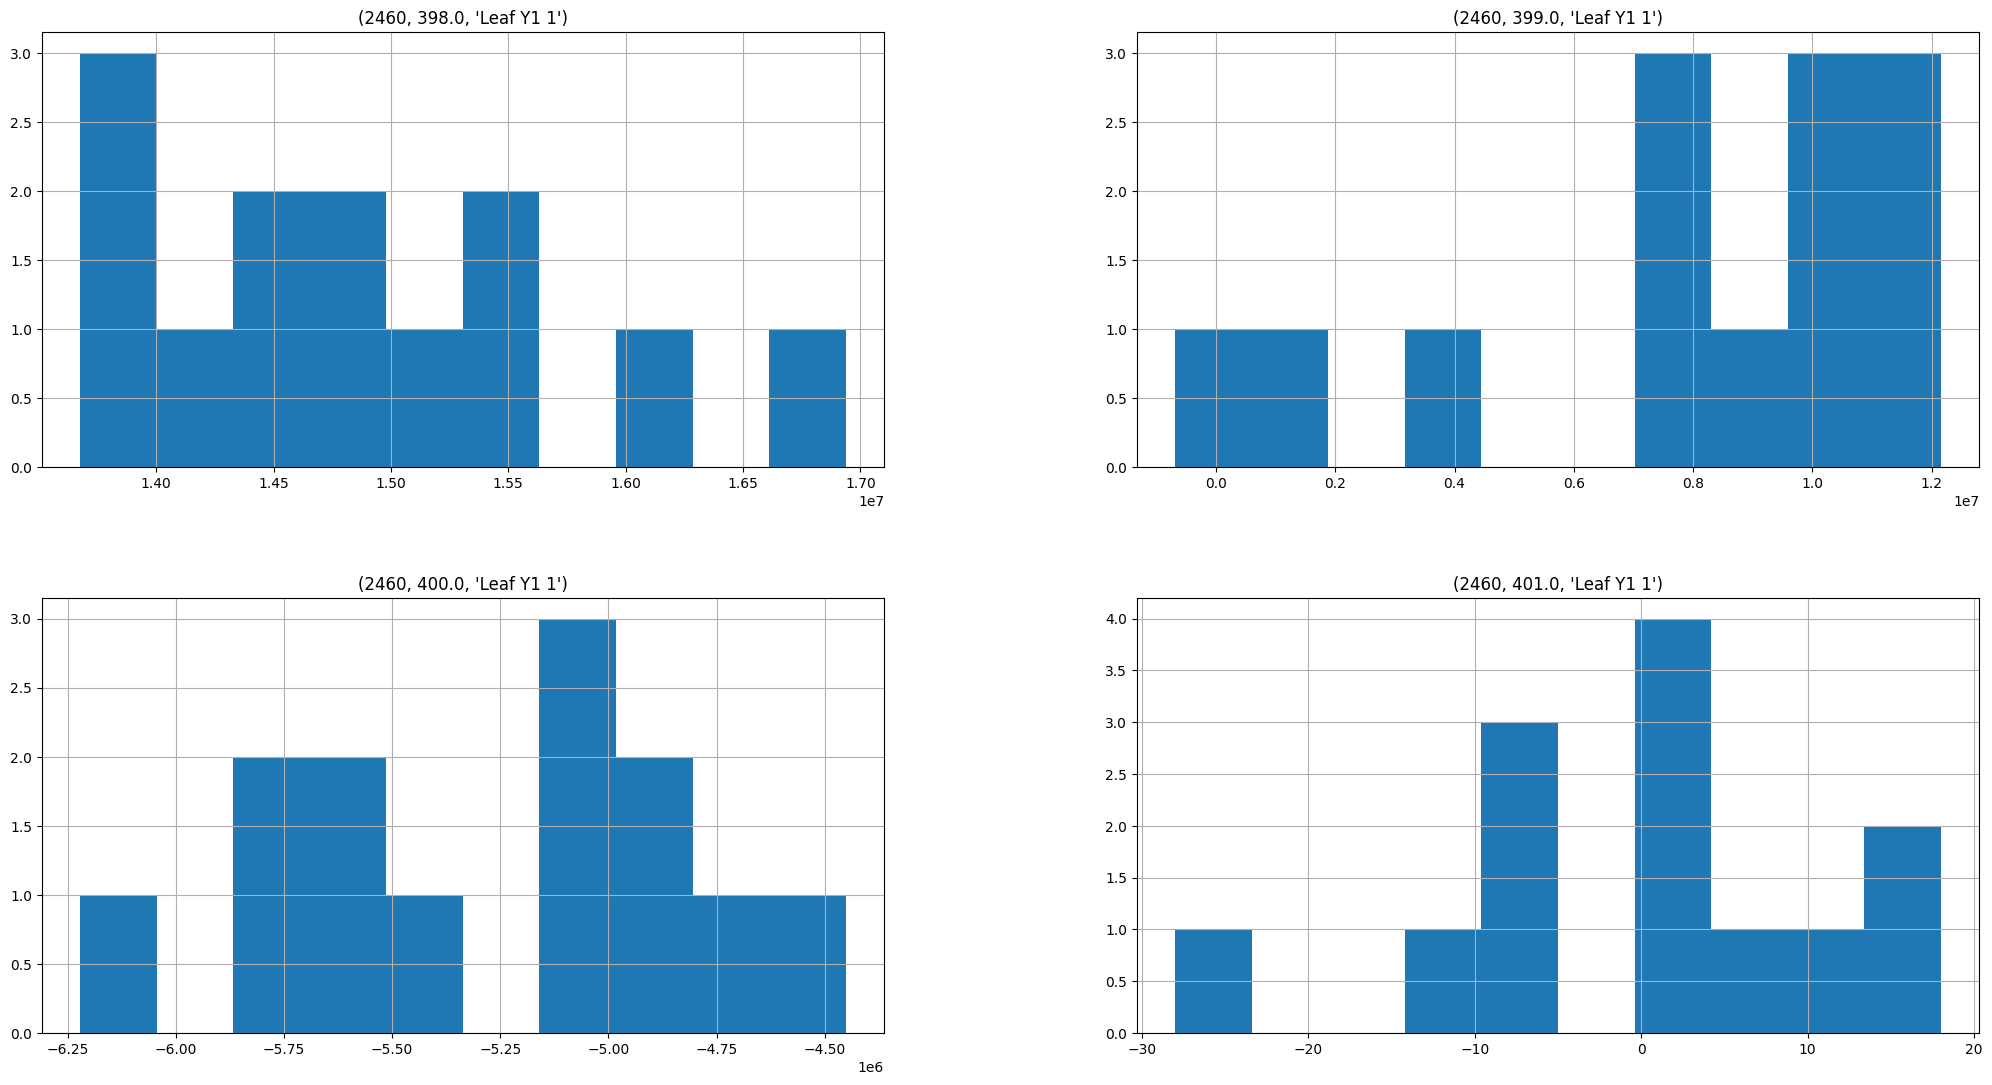

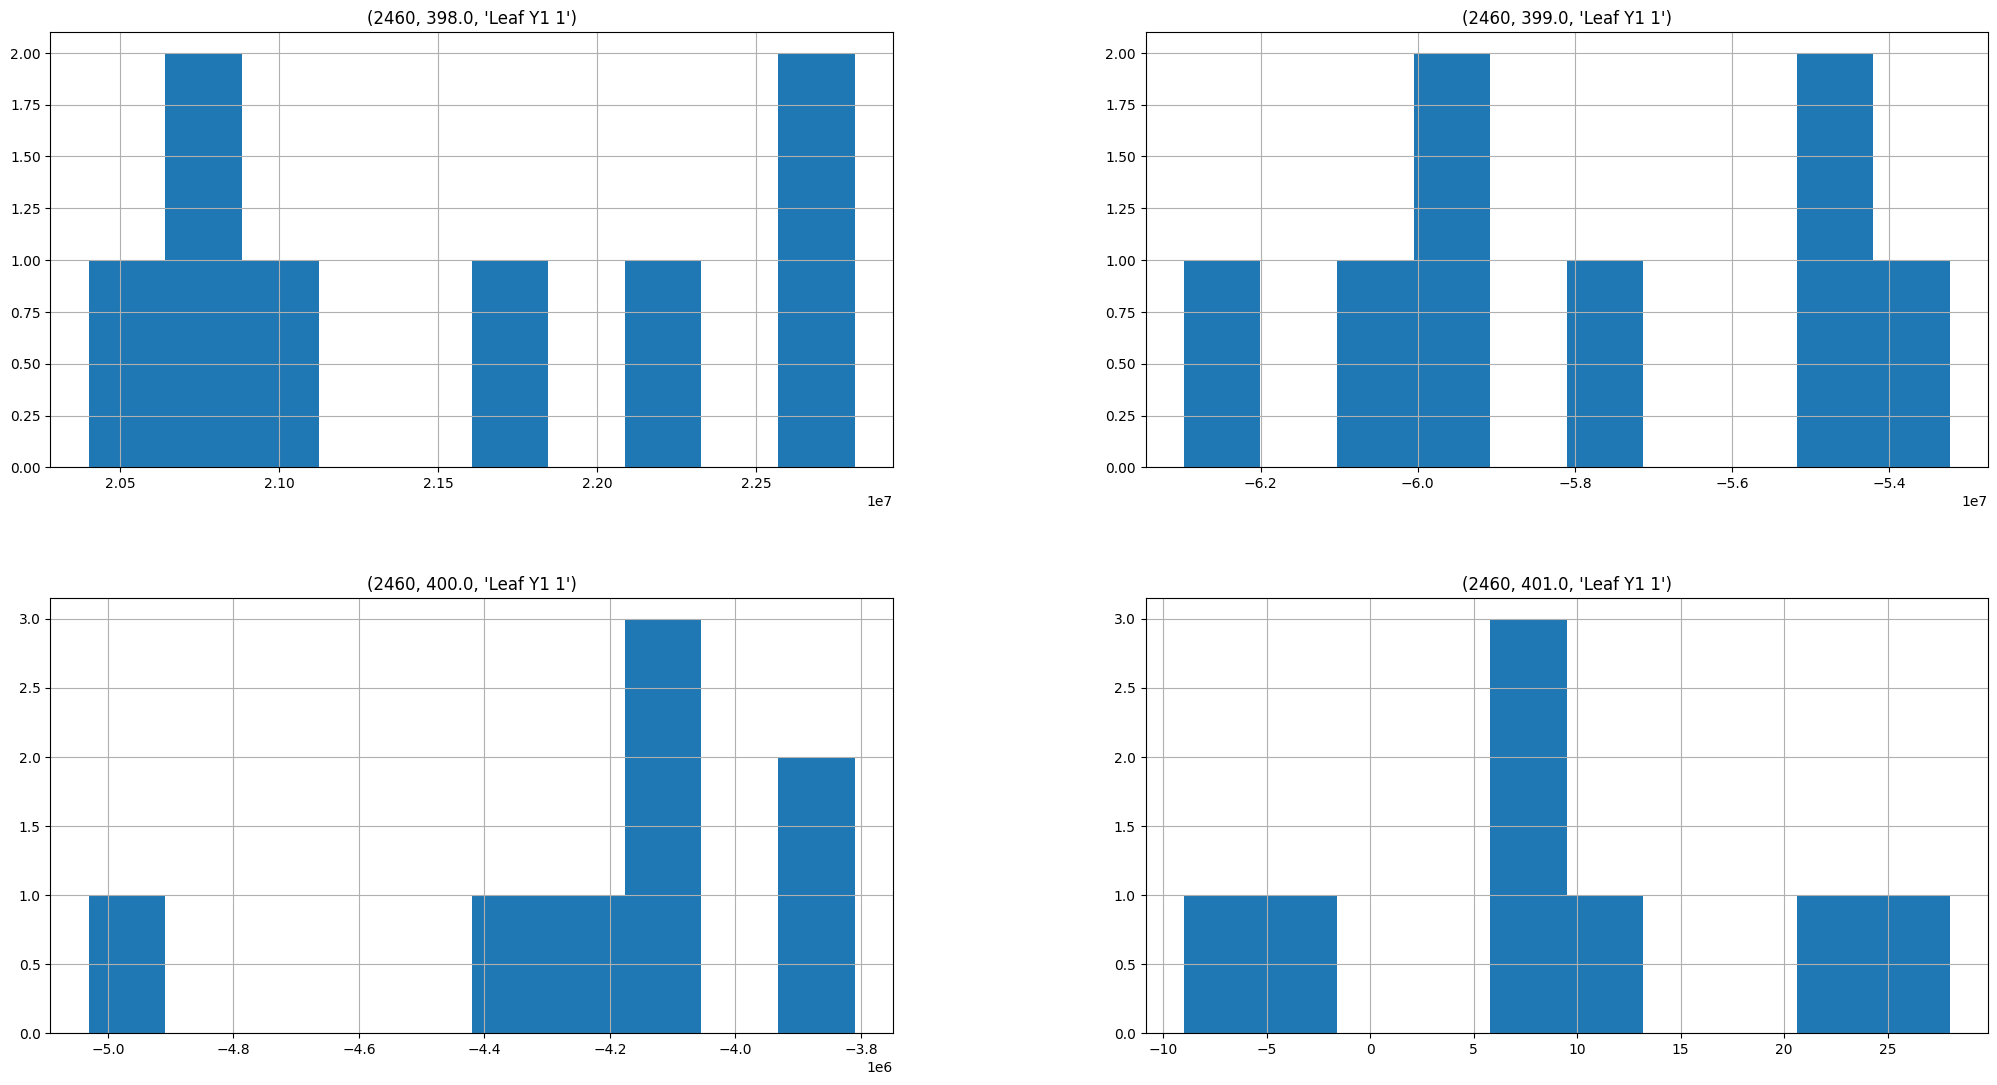

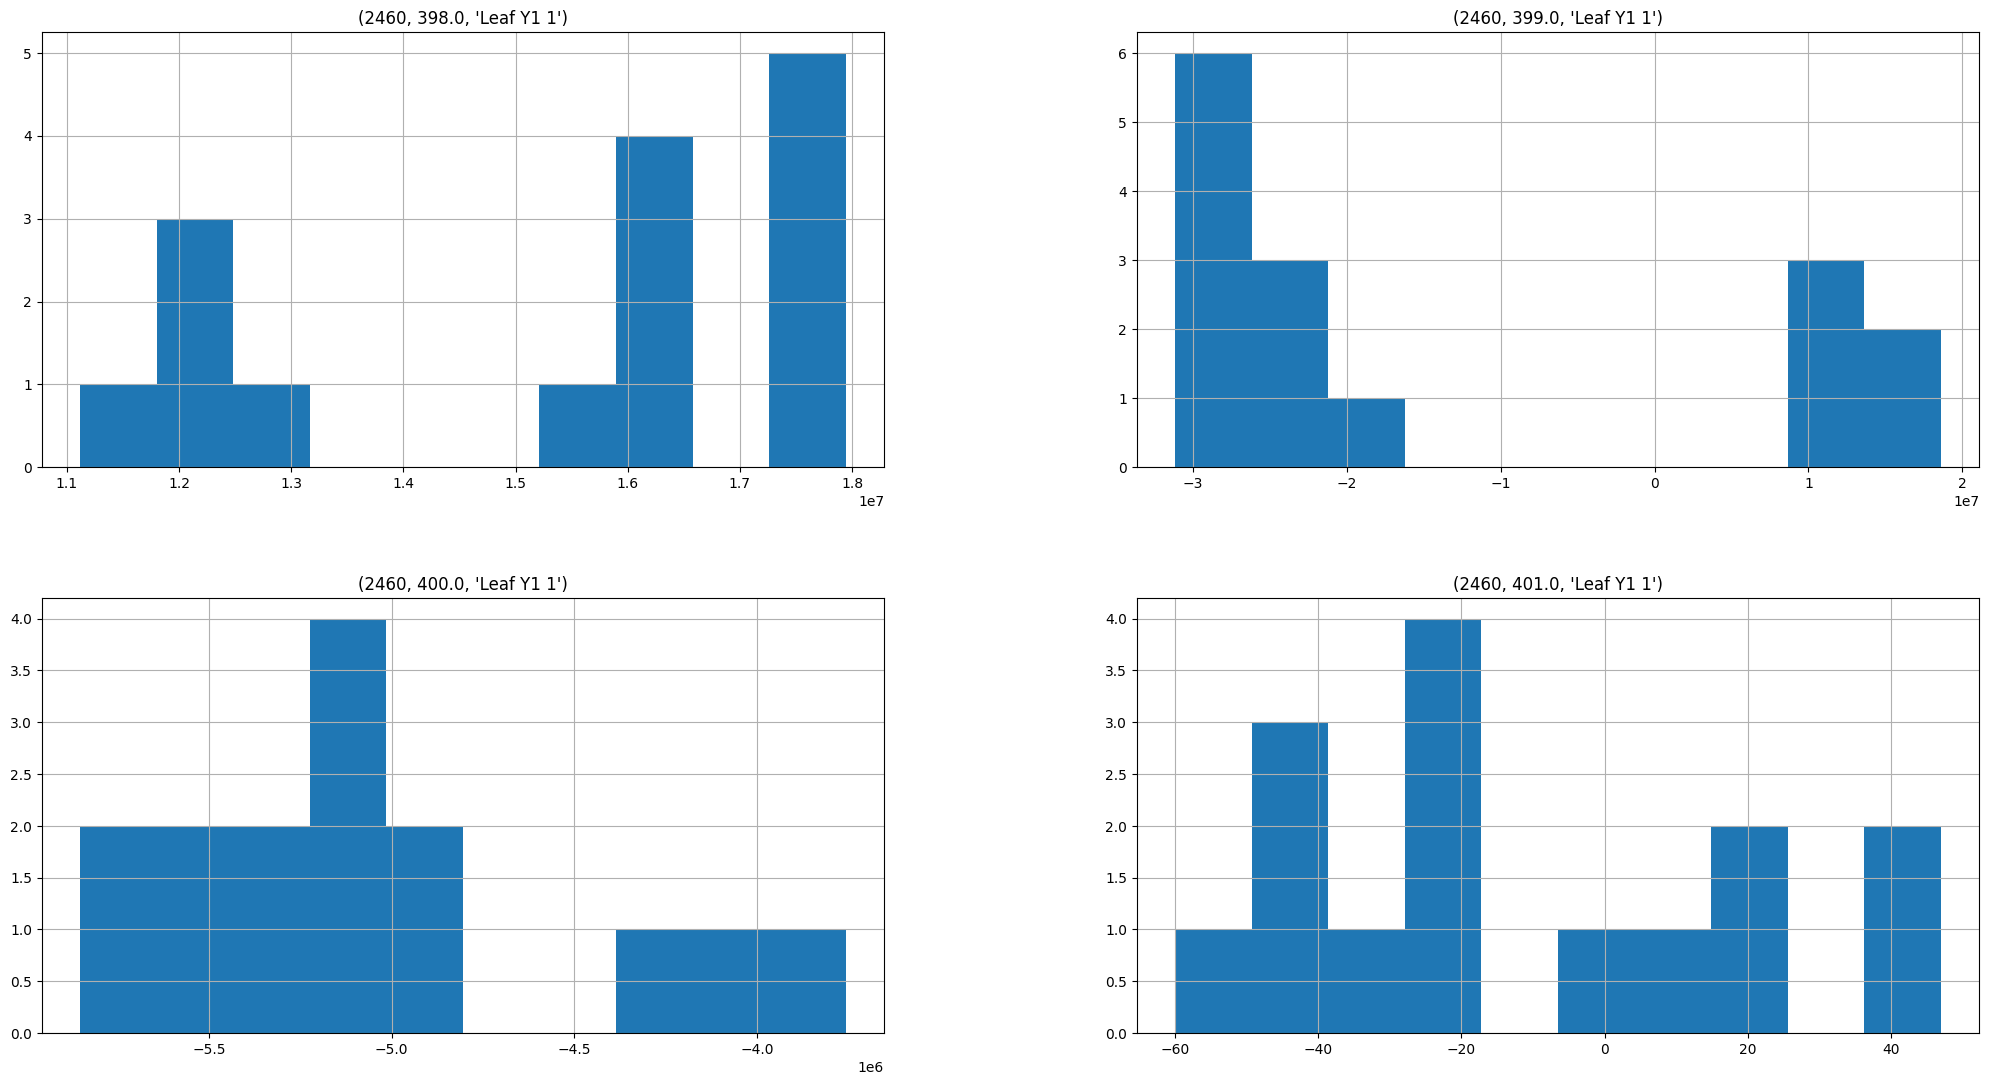

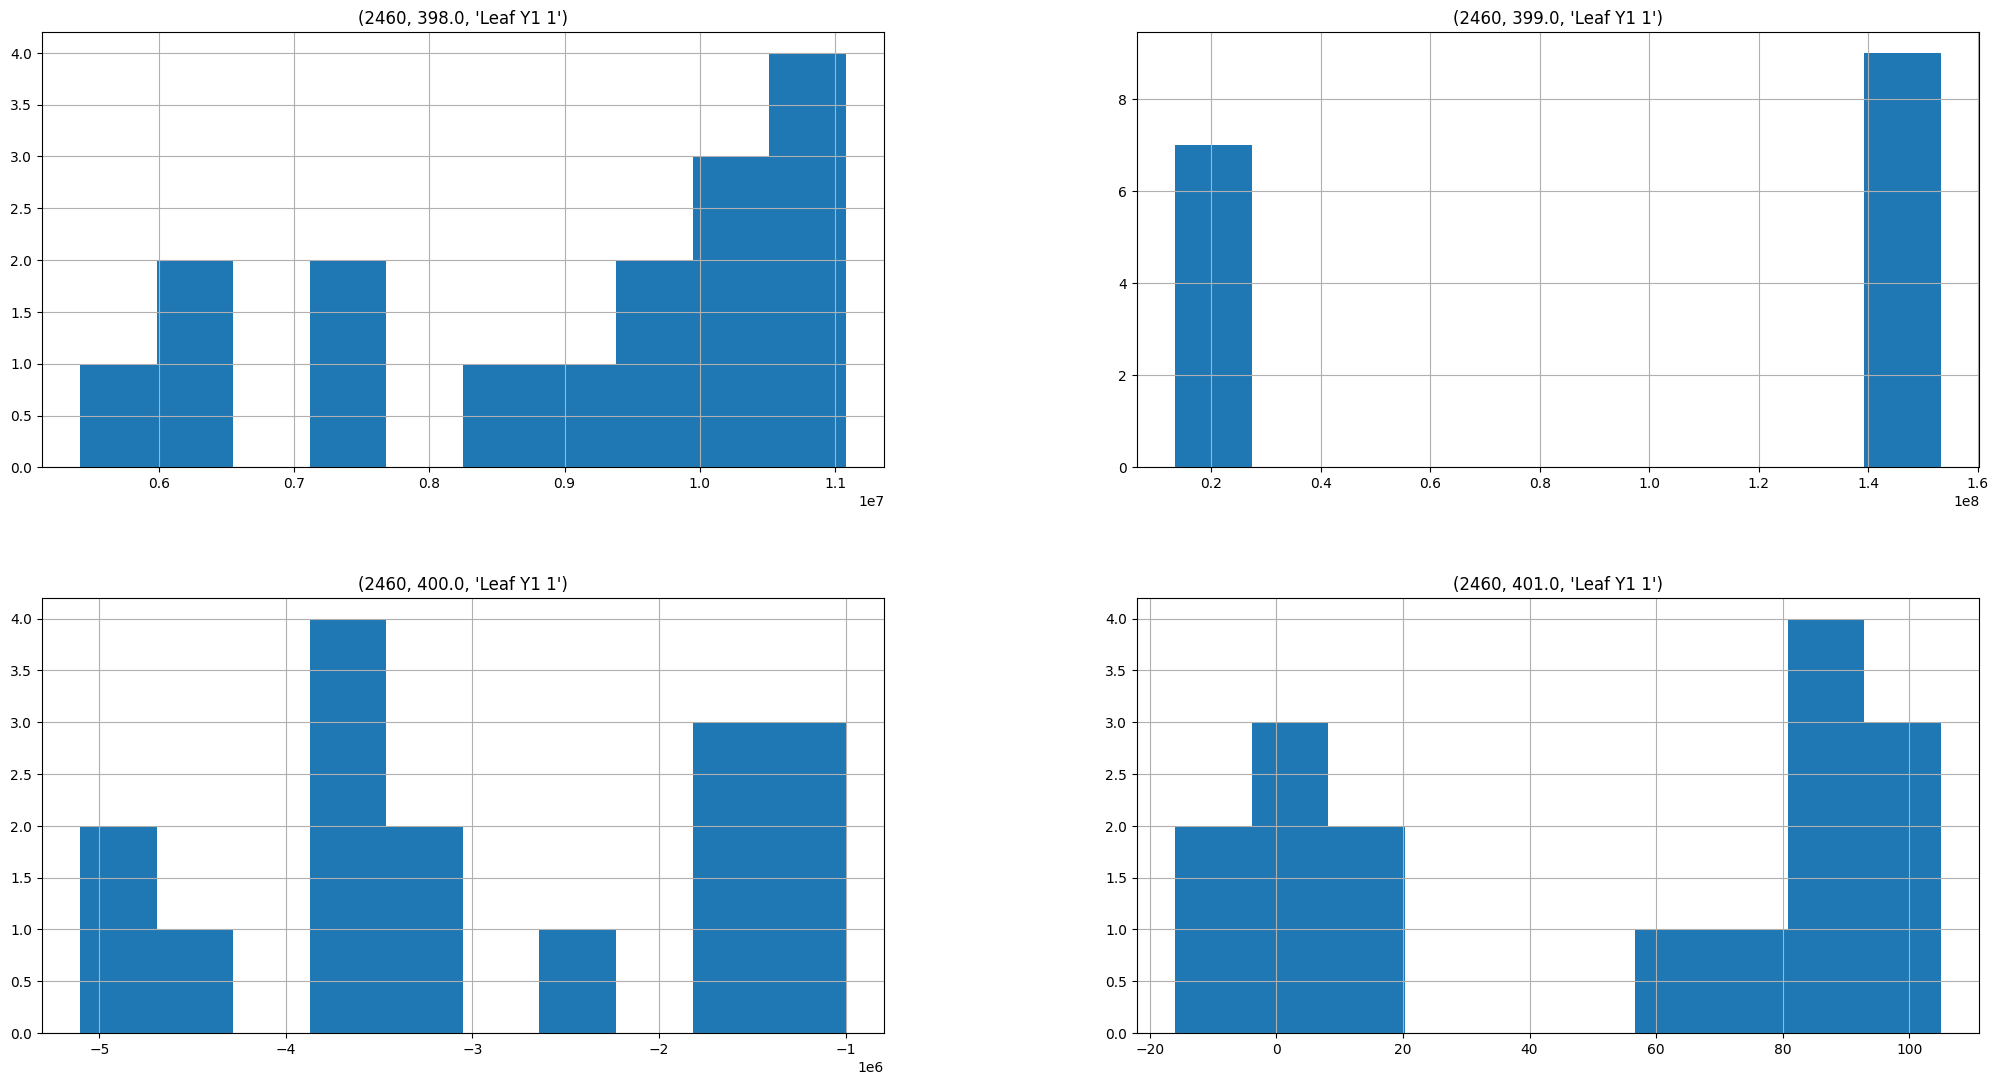

In [15]:
gen_cal = merged_df[merged_df["file_name"] == "Optics_Dist_Y1_01_To_40"]
gen_cal["Part&item"] = "I:"+ gen_cal["item"].astype(str) + " P:"+ gen_cal["part"].astype(str)

show, optics_y1 = determine_changes_analysis(gen_cal)

show.round(2)

In [16]:
for x in range(len(show.columns)):  
    p_I = show.columns[x][:2]


    fig = px.line(optics_y1[optics_y1["Part&item"] == f"I:{p_I[0]} P:{p_I[1]}"], x="date", y ="value", color="linac", hover_data=["Part&item", "category"],markers=True)
    fig.show()

In [ ]:
pivoted =  changes_df_total.pivot(index=["date", "linac", "file_name"], columns=["item", "part", "Part&item",], values="value").reset_index()
corrs = []
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 18))
linacs = pivoted["linac"].unique().tolist()
for num in range(len(linacs)):
    row, col = divmod(num, 2)
    corr = pivoted[pivoted["linac"] == linacs[num]].set_index(["date", "linac", "file_name"]).corr()
    corrs.append(corr)
    sns.heatmap(corr, cmap="jet", vmin=0.0, vmax=1.0, ax=axes[row, col], yticklabels=False, xticklabels=False )
    axes[row, col].set_title(f"Linac: {linacs[num]}")
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
results = pd.DataFrame()
linac = [2325, 2191, 2638, 2983]
num = -1

for df_corr in corrs:
    num += 1
    
    # Flatten MultiIndex to full "I:... P:..." labels for both rows and columns
    df_flat = df_corr.copy()
    df_flat.columns = df_flat.columns.map(lambda x: f"I:{x[0]} P:{x[1]}")
    df_flat.index = df_flat.index.map(lambda x: f"I:{x[0]} P:{x[1]}")

    # Stack and filter correlations
    df_result = (
        df_flat.stack()
        .reset_index()
        .rename(columns={"level_0": "row", "level_1": "col", 0: "correlation"})
        .query("correlation > 0.8 and correlation < 1")
    )

    # Add linac and deduplicate symmetrical pairs
    df_result["linac"] = linac[num]
    df_result["pair"] = df_result.apply(
        lambda x: tuple(sorted([x["row"], x["col"]])), axis=1
    )
    df_result = df_result.drop_duplicates(subset="pair").drop(columns="pair")

    results = pd.concat([results, df_result], ignore_index=True)

# Pivot to get correlation per linac for each unique pair
results.pivot(index=["row", "col"], values="correlation", columns="linac")